In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.DatabaseConnection import DatabaseConnection
from dotenv import find_dotenv
import matplotlib.colors as clr

colors = ['#c79242', '#c7a842', '#42c792', '#42c7a8', '#4242c7', '#a842c7']
cmap = clr.ListedColormap(colors)

plt.style.use("bmh")

In [2]:
dotenv_path = find_dotenv()
connection = DatabaseConnection(dotenv_path)

#### Connecting to database, downloading and preparing data

In [3]:
# 
query = """SELECT champion_id, champion_name FROM champions"""

champions = connection.execute_select_query(query)
champions = pd.DataFrame(champions)

champion_dict = champions.set_index('champion_id')['champion_name'].to_dict()
champion_dict[-1] = 'NOBAN'

In [4]:
champion_dict

{1: 'Annie',
 2: 'Olaf',
 3: 'Galio',
 4: 'Twisted Fate',
 5: 'Xin Zhao',
 6: 'Urgot',
 7: 'LeBlanc',
 8: 'Vladimir',
 9: 'Fiddlesticks',
 10: 'Kayle',
 11: 'Master Yi',
 12: 'Alistar',
 13: 'Ryze',
 14: 'Sion',
 15: 'Sivir',
 16: 'Soraka',
 17: 'Teemo',
 18: 'Tristana',
 19: 'Warwick',
 20: 'Nunu & Willump',
 21: 'Miss Fortune',
 22: 'Ashe',
 23: 'Tryndamere',
 24: 'Jax',
 25: 'Morgana',
 26: 'Zilean',
 27: 'Singed',
 28: 'Evelynn',
 29: 'Twitch',
 30: 'Karthus',
 31: "Cho'Gath",
 32: 'Amumu',
 33: 'Rammus',
 34: 'Anivia',
 35: 'Shaco',
 36: 'Dr. Mundo',
 37: 'Sona',
 38: 'Kassadin',
 39: 'Irelia',
 40: 'Janna',
 41: 'Gangplank',
 42: 'Corki',
 43: 'Karma',
 44: 'Taric',
 45: 'Veigar',
 48: 'Trundle',
 50: 'Swain',
 51: 'Caitlyn',
 53: 'Blitzcrank',
 54: 'Malphite',
 55: 'Katarina',
 56: 'Nocturne',
 57: 'Maokai',
 58: 'Renekton',
 59: 'Jarvan IV',
 60: 'Elise',
 61: 'Orianna',
 62: 'Wukong',
 63: 'Brand',
 64: 'Lee Sin',
 67: 'Vayne',
 68: 'Rumble',
 69: 'Cassiopeia',
 72: 'Skarner',

In [5]:
# 
query = """SELECT match_id, ban_1, ban_2, ban_3, ban_4, ban_5 ,ban_6, ban_7,
           ban_8, ban_9, ban_10
           FROM champion_bans"""


bans_raw_data = connection.execute_select_query(query)
bans_raw_data = pd.DataFrame(bans_raw_data)

In [6]:
query = """SELECT match_id, `rank`, lane FROM player_data"""

player_data = connection.execute_select_query(query)
player_data = pd.DataFrame(player_data)

mode_ranks = player_data.groupby('match_id')['rank'].agg(lambda x: x.mode()[0])
result_df = pd.DataFrame({'match_id': mode_ranks.index, 'mode_rank': mode_ranks.values})

In [7]:
result_df

,match_id,mode_rank
0,EUW1_6835690099,UNRANKED
1,EUW1_6835777630,UNRANKED
2,EUW1_6835830547,UNRANKED
3,EUW1_6836341241,UNRANKED
4,EUW1_6836711206,UNRANKED
...,...,...
895,EUW1_6945278030,BRONZE
896,EUW1_6945316729,BRONZE
897,EUW1_6945408901,IRON
898,EUW1_6945415578,IRON


In [8]:
player_data

,match_id,rank,lane
0,EUW1_6835690099,UNRANKED,JNG
1,EUW1_6835690099,UNRANKED,JNG
2,EUW1_6835690099,UNRANKED,SUPP
3,EUW1_6835690099,UNRANKED,TOP
4,EUW1_6835690099,UNRANKED,SUPP
...,...,...,...
8995,EUW1_6945616640,SILVER,MID
8996,EUW1_6945616640,SILVER,TOP
8997,EUW1_6945616640,SILVER,BOT
8998,EUW1_6945616640,SILVER,JNG


In [9]:
for col in bans_raw_data.columns[1:]:
    bans_raw_data[col] = bans_raw_data[col].map(champion_dict)
    bans_raw_data.rename(columns={col: col.replace('id', 'name')}, inplace=True)

In [10]:
bans_with_ranks_df = result_df.merge(bans_raw_data)

In [11]:
bans_with_ranks_df

,match_id,mode_rank,ban_1,ban_2,ban_3,ban_4,ban_5,ban_6,ban_7,ban_8,ban_9,ban_10
0,EUW1_6835690099,UNRANKED,Tristana,Maokai,Evelynn,Pyke,Senna,Zyra,Garen,Senna,Briar,Aurelion Sol
1,EUW1_6835777630,UNRANKED,Morgana,Briar,Samira,Aatrox,NOBAN,LeBlanc,Leona,Aatrox,Fiora,Samira
2,EUW1_6835830547,UNRANKED,Bel'Veth,Briar,Vayne,Illaoi,Zed,Vladimir,NOBAN,Ivern,Maokai,Evelynn
3,EUW1_6836341241,UNRANKED,Yasuo,Draven,Smolder,Evelynn,Nocturne,Cassiopeia,Nocturne,Lucian,Samira,Volibear
4,EUW1_6836711206,UNRANKED,Briar,Jax,Maokai,Rammus,Evelynn,Yuumi,Ahri,Master Yi,Evelynn,Malphite
...,...,...,...,...,...,...,...,...,...,...,...,...
895,EUW1_6945278030,BRONZE,Ashe,Illaoi,Briar,Annie,Brand,Sylas,Briar,Nautilus,Shaco,Brand
896,EUW1_6945316729,BRONZE,Vayne,Nautilus,Sylas,Shaco,Mordekaiser,Draven,Jax,Malzahar,Lee Sin,Blitzcrank
897,EUW1_6945408901,IRON,Tahm Kench,Irelia,Caitlyn,Lillia,Lux,Samira,Illaoi,Rammus,Malzahar,Xerath
898,EUW1_6945415578,IRON,Tristana,Mordekaiser,Jhin,Yone,Blitzcrank,Braum,Teemo,Lux,Veigar,Rammus


#### Frequency based on columns

In [12]:
all_values = bans_raw_data.stack()
most_frequent_values = all_values.value_counts().head(167)
df_most_frequent_values = all_values.value_counts().head(20)
df_most_frequent_values = df_most_frequent_values.reset_index()
most_frequent_values.columns = ['most_frequent', 'frequency']
df_most_frequent_values.columns = ['most_frequent', 'frequency']

In [13]:
df_most_frequent_values

,most_frequent,frequency
0,Draven,375
1,Yasuo,246
2,NOBAN,244
3,Brand,235
4,Pyke,234
5,Blitzcrank,225
6,Illaoi,221
7,Samira,210
8,Shaco,210
9,Darius,199


#### Bans frequency

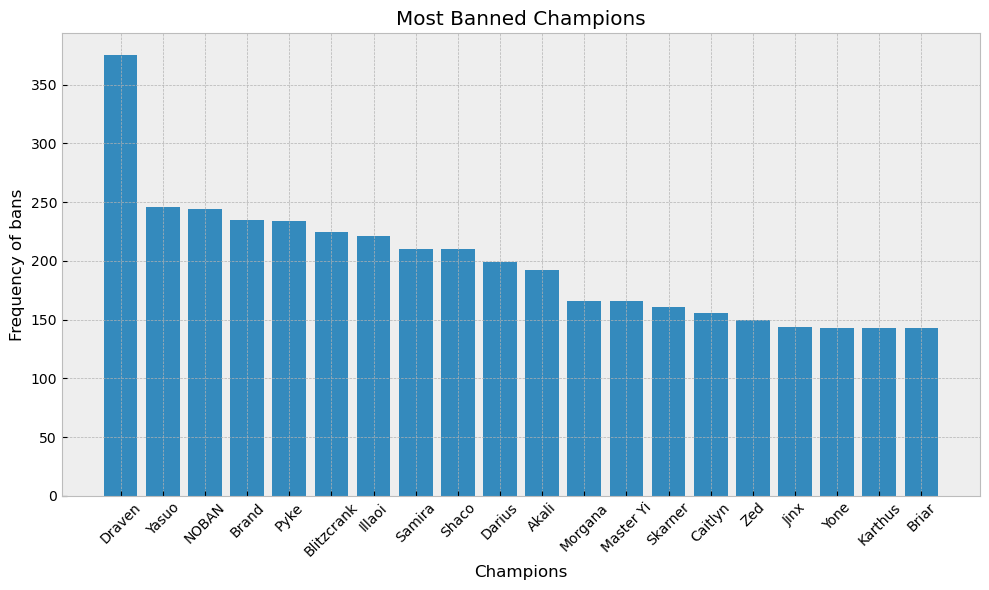

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df_most_frequent_values['most_frequent'], df_most_frequent_values['frequency'])
plt.xlabel('Champions')
plt.ylabel('Frequency of bans')
plt.title('Most Banned Champions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Bans by ranks

In [15]:
bans_by_ranks = pd.melt(bans_with_ranks_df, id_vars=['mode_rank'], value_vars=[f'ban_{i}' for i in range(1, 11)])

bans_by_ranks = bans_by_ranks.dropna()

unique_ranks = bans_by_ranks['mode_rank'].unique()

rank_dataframes = {}

for rank in unique_ranks:
    rank_df = bans_by_ranks[bans_by_ranks['mode_rank'] == rank]
    rank_dataframes[rank] = rank_df.groupby(['mode_rank', 'value']).size().reset_index(name='number_of_bans')


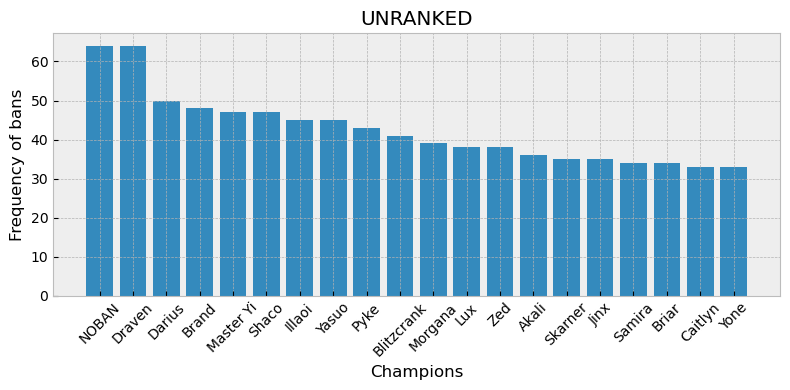

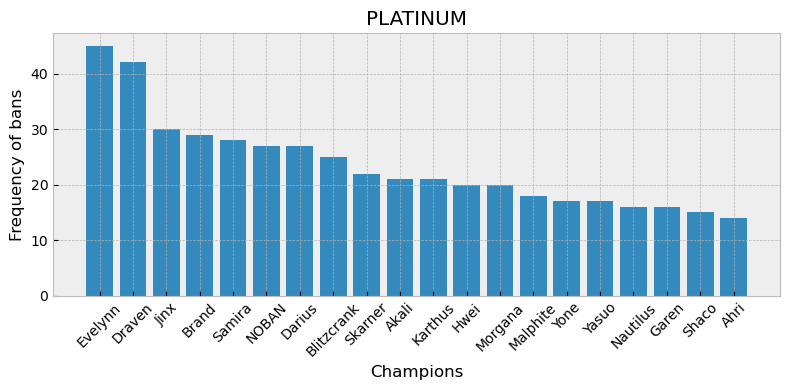

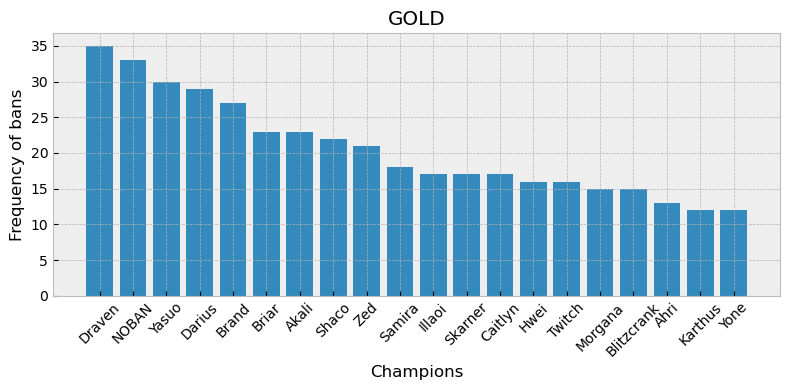

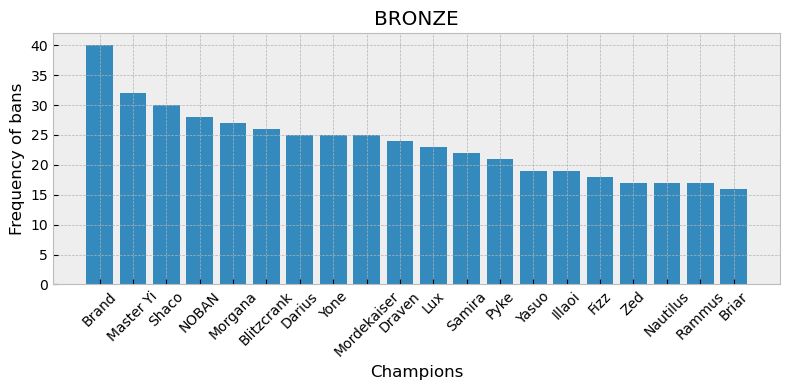

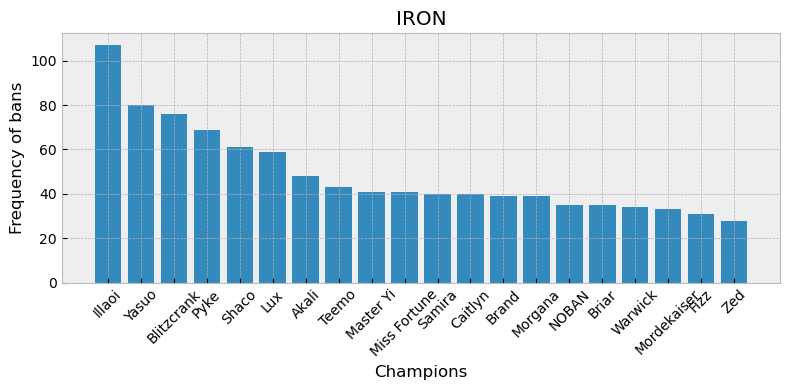

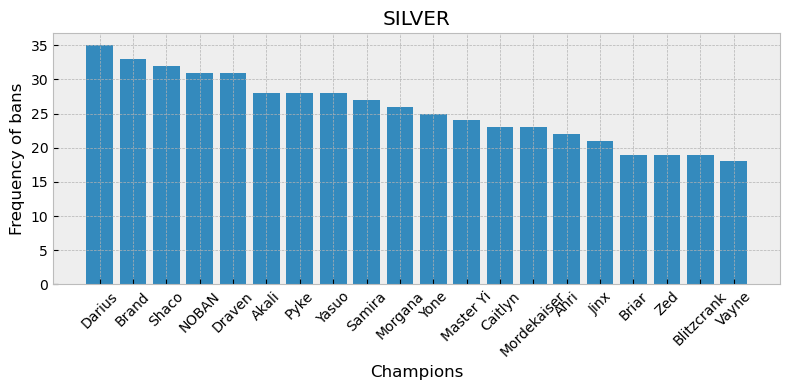

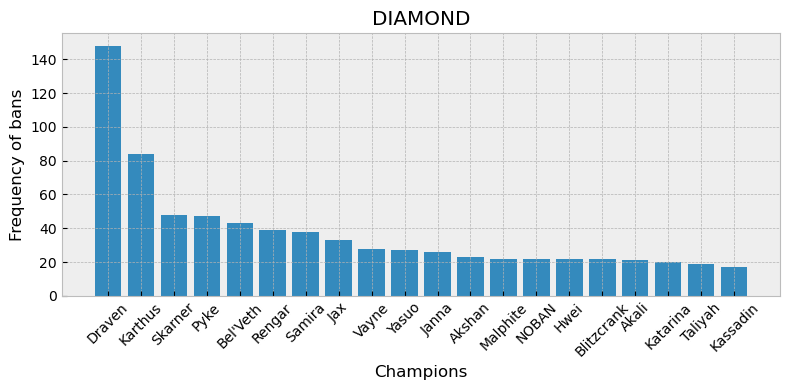

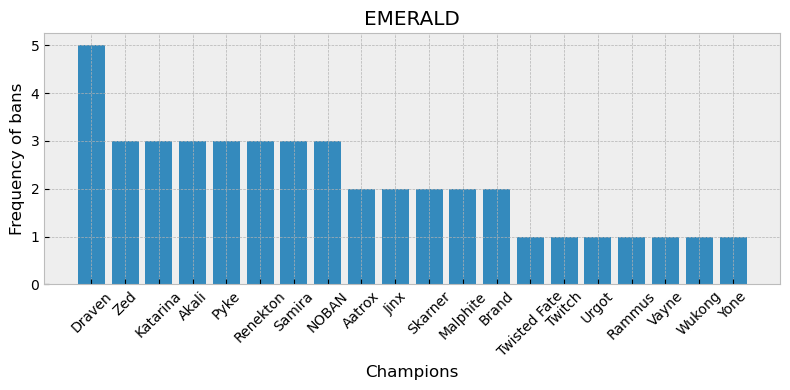

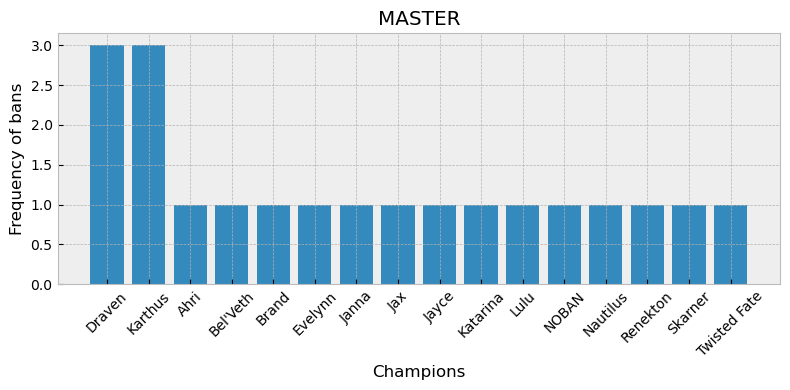

In [16]:
for rank, rank_df in rank_dataframes.items():
    plt.figure(figsize=(8, 4))
    to_plot = rank_df.sort_values(by='number_of_bans', ascending=False).head(20)
    plt.bar(to_plot['value'], to_plot['number_of_bans'])
    plt.xlabel('Champions')
    plt.ylabel('Frequency of bans')
    plt.title(rank)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Percentage of banning

In [17]:
no_bans = df_most_frequent_values.iloc[2]['frequency']
sum_of_bans = most_frequent_values.sum()

In [18]:
no_bans

244

In [19]:
sum_of_bans

9000

([<matplotlib.patches.Wedge at 0x7cef05732290>,
 [Text(-1.0960125562061336, 0.09357604735453, 'Sum of bans'),
  Text(1.2952875657782947, -0.11058988172586091, 'No ban')],
 [Text(-0.5978250306578909, 0.05104148037519817, '97.3%'),
  Text(0.7971000404789507, -0.06805531183129901, '2.7%')])

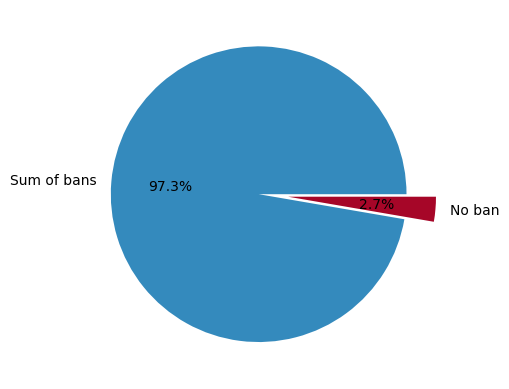

In [20]:
labels = 'Sum of bans', 'No ban'
sizes = [sum_of_bans - no_bans, no_bans]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0, 0.2))